In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [2]:
# load list of protein IDs as dataframe
ID_file = 'data/processed/gastric_ID_list.csv'
gastric_ID = pd.read_csv(ID_file, index_col=0)
gastric_ID.reset_index(drop=True, inplace=True)
gastric_ID

,ID
0,P06493
1,P35237
2,P02655
3,Q00341
4,P46781
...,...
3909,R4GMX3
3910,Q5VZ89
3911,S4R303
3912,V9GYT7


## EDA

In [3]:
file = 'data/processed/gastric_clean_unst.csv'

In [4]:
# load gastric dataset as dataframe
gastric_df = pd.read_csv(file, index_col=0)
gastric_df.reset_index(drop=True, inplace=True)
gastric_df

,NC1 Log2,NC2 Log2,NC3 Log2,NC4 Log2,GC1 Log2,GC2 Log2,GC3 Log2,GC4 Log2,PL1 Log2,PL2 Log2,...,RNA degradation,Mismatch repair,Stomach specific,Mitochondrion,Cytoplasm,Extracellular exosome,Membrane,Nucleus,Endoplasmic reticulum,Golgi apparatus
0,14.141872,14.107314,13.862564,13.757528,14.283957,13.844870,14.446062,14.238953,14.157263,13.412358,...,0,0,0,1,1,1,1,1,0,0
1,18.189801,18.202496,18.049074,18.069828,18.372977,18.240611,18.414903,18.385577,18.464838,18.382029,...,0,0,0,0,1,1,0,1,0,0
2,15.370743,15.220339,14.877490,14.877915,15.250045,15.182754,15.617631,15.404629,15.313874,14.679077,...,0,0,0,0,0,1,0,0,0,0
3,20.695419,20.764910,20.609847,20.648786,20.419828,20.184950,20.393157,20.341481,20.694539,20.345622,...,0,0,0,0,1,0,0,1,0,0
4,19.076272,19.118719,19.159973,19.142240,18.936441,18.792552,18.894393,18.742887,18.848415,18.776311,...,0,0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3909,12.901462,13.211006,13.401413,13.283953,13.499713,13.480609,13.207380,13.471890,13.221693,13.314391,...,0,0,0,0,1,0,0,1,0,0
3910,14.153375,14.074614,14.294366,14.275029,14.141097,14.475560,14.173025,14.205150,14.154766,14.456927,...,0,0,0,0,0,0,0,0,0,0
3911,14.537214,14.515092,14.198650,14.548186,13.307382,13.813228,13.612146,13.882917,14.146743,14.460718,...,0,0,0,0,1,0,0,1,0,0
3912,13.652200,13.503825,12.866414,13.433816,13.270009,12.735903,13.123058,13.411304,13.479893,12.886742,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# standardized first 12 columns (disease values)
stand_scaler = preprocessing.StandardScaler()
x_scaled = stand_scaler.fit_transform(gastric_df.iloc[:,:12].values)
gastric_df.iloc[:,:12] = pd.DataFrame(x_scaled,columns=gastric_df.iloc[:,:12].columns)
gastric_df.to_csv('data/processed/gastric_clean.csv')
gastric_df

,NC1 Log2,NC2 Log2,NC3 Log2,NC4 Log2,GC1 Log2,GC2 Log2,GC3 Log2,GC4 Log2,PL1 Log2,PL2 Log2,...,RNA degradation,Mismatch repair,Stomach specific,Mitochondrion,Cytoplasm,Extracellular exosome,Membrane,Nucleus,Endoplasmic reticulum,Golgi apparatus
0,-0.937184,-0.932694,-1.081250,-1.139387,-0.867469,-1.111541,-0.796004,-0.930735,-0.901926,-1.298579,...,0,0,0,1,1,1,1,1,0,0
1,1.037428,1.011747,0.963221,0.974837,1.123046,1.101832,1.125464,1.168778,1.135156,1.134685,...,0,0,0,0,1,1,0,1,0,0
2,-0.337731,-0.404216,-0.585614,-0.590086,-0.397182,-0.437881,-0.228803,-0.340531,-0.354956,-0.678364,...,0,0,0,0,0,1,0,0,0,0
3,2.259689,2.228412,2.213767,2.239242,2.119443,2.080858,2.083213,2.159088,2.189596,2.096106,...,0,0,0,0,1,0,0,1,0,0
4,1.469856,1.446781,1.505725,1.500617,1.397337,1.379748,1.357604,1.349691,1.316552,1.327735,...,0,0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3909,-1.542267,-1.358271,-1.306452,-1.371570,-1.249235,-1.294956,-1.395698,-1.319114,-1.344363,-1.346546,...,0,0,0,0,1,0,0,1,0,0
3910,-0.931573,-0.948220,-0.870381,-0.885668,-0.937012,-0.793972,-0.928192,-0.947850,-0.903107,-0.787134,...,0,0,0,0,0,0,0,0,0,0
3911,-0.744334,-0.739076,-0.917124,-0.751745,-1.342860,-1.127474,-1.199735,-1.111003,-0.906901,-0.785278,...,0,0,0,0,1,0,0,1,0,0
3912,-1.176050,-1.219238,-1.567718,-1.298096,-1.361053,-1.669936,-1.436522,-1.349789,-1.222258,-1.555933,...,0,0,0,0,0,0,0,1,0,0


## PCA for patient samples

PCA for patient-based data with features as proteins

In [6]:
file = 'data/processed/patient_gastric.csv'

In [7]:
# load gastric dataset in terms of patient samples as dataframe
patient_df = pd.read_csv(file, index_col=0)
patient_df.reset_index(drop=True, inplace=True)
patient_df.columns = list(gastric_ID['ID'])
patient_df

,P06493,P35237,P02655,Q00341,P46781,Q9H4M9,O00748,P25787,Q14241,Q96BI1,...,Q9Y6R7,Q9Y6U3,Q9Y6W5,Q9Y6X5,Q9Y6Y8,R4GMX3,Q5VZ89,S4R303,V9GYT7,Q03519
0,14.141872,18.189801,15.370743,20.695419,19.076272,17.123919,17.764218,16.188378,14.182892,14.633818,...,19.991036,17.797028,17.818882,12.053686,18.141450,12.901462,14.153375,14.537214,13.652200,16.352512
1,14.107314,18.202496,15.220339,20.764910,19.118719,17.200443,17.776666,16.313253,14.209927,14.697544,...,20.026804,17.862611,17.746054,11.264267,18.218309,13.211006,14.074614,14.515092,13.503825,16.393447
2,13.862564,18.049074,14.877490,20.609847,19.159973,17.497630,17.692788,16.479957,13.840476,14.573115,...,20.047174,17.761044,17.755131,12.500099,18.095022,13.401413,14.294366,14.198650,12.866414,16.436029
3,13.757528,18.069828,14.877915,20.648786,19.142240,17.435956,17.636674,16.473456,13.860506,14.771464,...,20.020296,17.752938,17.723194,12.528126,18.152042,13.283953,14.275029,14.548186,13.433816,16.495736
4,14.283957,18.372977,15.250045,20.419828,18.936441,17.223402,18.612105,16.191802,13.787683,14.437127,...,20.151233,17.429235,17.678690,10.795212,17.867372,13.499713,14.141097,13.307382,13.270009,16.188035
5,13.844870,18.240611,15.182754,20.184950,18.792552,17.594148,18.522054,16.548121,13.717444,14.746656,...,20.210639,17.273450,17.691193,13.195557,17.831019,13.480609,14.475560,13.813228,12.735903,16.363108
6,14.446062,18.414903,15.617631,20.393157,18.894393,17.303590,18.659673,16.374249,13.903670,14.534994,...,20.235168,17.380210,17.793484,12.078803,17.950243,13.207380,14.173025,13.612146,13.123058,16.356790
7,14.238953,18.385577,15.404629,20.341481,18.742887,17.186565,18.633122,16.189146,13.915617,14.693789,...,20.143621,17.369401,17.713564,12.378260,17.727023,13.471890,14.205150,13.882917,13.411304,16.357408
8,14.157263,18.464838,15.313874,20.694539,18.848415,17.193123,18.207764,16.251555,13.941616,14.651519,...,20.374420,17.941426,17.880060,11.470290,18.051019,13.221693,14.154766,14.146743,13.479893,16.437476
9,13.412358,18.382029,14.679077,20.345622,18.776311,17.732135,18.133969,16.610072,13.794923,15.039762,...,20.509983,17.718124,17.723361,13.456666,17.954646,13.314391,14.456927,14.460718,12.886742,16.629294


In [8]:
# standardize columns (disease values)
stand_scaler = preprocessing.StandardScaler()
x_scaled = stand_scaler.fit_transform(patient_df)
patient_st_df = pd.DataFrame(x_scaled,columns=patient_df.columns)
patient_st_df

,P06493,P35237,P02655,Q00341,P46781,Q9H4M9,O00748,P25787,Q14241,Q96BI1,...,Q9Y6R7,Q9Y6U3,Q9Y6W5,Q9Y6X5,Q9Y6Y8,R4GMX3,Q5VZ89,S4R303,V9GYT7,Q03519
0,0.544118,-0.812025,0.823288,1.000859,1.008297,-1.283461,-1.081569,-1.174989,1.541130,-0.462661,...,-1.283244,0.546155,1.119574,-0.208406,0.928971,-2.243973,-0.787303,1.009422,1.331512,-0.443287
1,0.417852,-0.723004,0.222436,1.404249,1.287224,-0.853562,-1.047568,-0.286739,1.715430,-0.044642,...,-1.075637,0.832450,-0.200167,-1.298116,1.475111,-0.387095,-1.450628,0.952493,0.822914,-0.030796
2,-0.476399,-1.798894,-1.147224,0.504124,1.558306,0.815974,-1.276677,0.899047,-0.666509,-0.860854,...,-0.957405,0.389070,-0.035677,0.407821,0.599071,0.755108,0.400108,0.138134,-1.361997,0.398294
3,-0.860174,-1.653355,-1.145528,0.730157,1.441784,0.469503,-1.429949,0.852806,-0.537374,0.440244,...,-1.113409,0.353684,-0.614422,0.446509,1.004240,0.050494,0.237255,1.037659,0.582937,0.999947
4,1.063256,0.472526,0.341106,-0.598916,0.089460,-0.724585,1.234383,-1.150637,-1.006876,-1.752887,...,-0.353424,-1.059408,-1.420886,-1.945597,-1.018550,1.344781,-0.890713,-2.155524,0.021442,-2.100683
5,-0.541048,-0.455711,0.072284,-1.962361,-0.856047,1.358195,0.988415,1.383904,-1.459727,0.277516,...,-0.008612,-1.739473,-1.194319,1.367828,-1.276861,1.230182,1.926115,-0.853741,-1.809359,-0.336508
6,1.655547,0.766532,1.809591,-0.753743,-0.186837,-0.274106,1.364311,0.147135,-0.259081,-1.110909,...,0.133759,-1.273423,0.659343,-0.173735,-0.429689,-0.408852,-0.621812,-1.371222,-0.482275,-0.400174
7,0.898825,0.560879,0.958662,-1.053717,-1.182393,-0.931529,1.291788,-1.169530,-0.182059,-0.069272,...,-0.397606,-1.320610,-0.788934,0.239635,-2.015830,1.177876,-0.351263,-0.674396,0.505771,-0.393952
8,0.600351,1.116715,0.596102,0.995749,-0.488964,-0.894683,0.129949,-0.725604,-0.014436,-0.346549,...,0.942007,1.176507,2.228213,-1.013723,0.286399,-0.322990,-0.775589,0.004553,0.740881,0.412873
9,-2.121331,0.535998,-1.939870,-1.029675,-0.962764,2.133379,-0.071616,1.824574,-0.960199,2.200184,...,1.728846,0.201706,-0.611384,1.728261,-0.398403,0.233085,1.769187,0.812561,-1.292317,2.345788


Variance explained by first two PCA vectors for pattern clustering: 0.5810666446957803


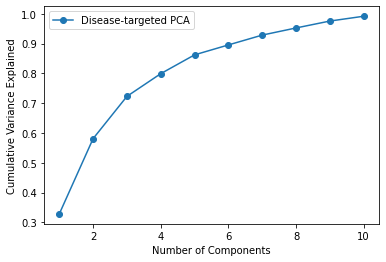

In [9]:
# perform PCA and plot variance over components
pca = PCA(n_components=10)
patient_pca = pca.fit_transform(patient_df)

ratio = pca.explained_variance_ratio_
print("Variance explained by first two PCA vectors for pattern clustering:", ratio[0]+ratio[1])

x = range(1,11)
y = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure()
plt.plot(x,y, marker='o');
plt.xlabel('Number of Components');
plt.ylabel('Cumulative Variance Explained');
plt.legend(['Disease-targeted PCA']);
fig.savefig('figures/gastric_patient_cumvar_PCA.png')

In [10]:
# perform PCA with 2 components
pca = PCA(n_components=2)
patient_pca = pca.fit_transform(patient_df)
patient_pca_df = pd.DataFrame(data = patient_pca, columns = ['PC 1', 'PC 2'])
print(pca.explained_variance_ratio_)

[0.32846017 0.25260647]


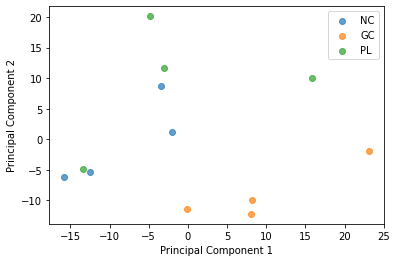

In [14]:
# plot PCA targeting disease
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
disease = pd.DataFrame(['NC']*4 + ['GC']*4 + ['PL']*4, columns=['d'])
targets = ['NC', 'GC', 'PL']

# plot each tumor type label in different color
for target in targets:
    ind = disease['d'] == target
    ax.scatter(patient_pca_df.loc[ind, 'PC 1']
               , patient_pca_df.loc[ind, 'PC 2']
               , alpha=0.7);
    
ax.legend(targets, loc='best');
fig.savefig('figures/gastric_patient_PCA.png')

### feature contribution

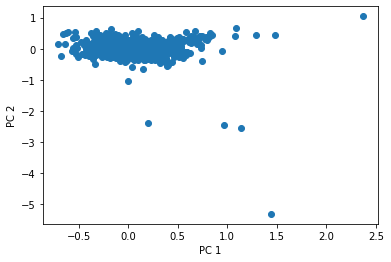

In [12]:
# determine PCA loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
load1 = loadings[:,0]
load2 = loadings[:,1]

# plot loadings for PC1 and PC2
fig = plt.figure();
plt.scatter(load1, load2);
plt.xlabel('PC 1');
plt.ylabel('PC 2');
fig.savefig('figures/gastric_patient_load12.png')

In [13]:
# determine top three proteins contributing
# find combined contribution to PC1 and PC2 for each feature
comb_weight = []
for i in range(len(patient_df.columns)):
    comb_weight.append(np.sqrt(load1[i]**2 + load2[i]**2))
    
# find order of indices after sorting from low to high values of combined weight of features
sort_index = np.argsort(comb_weight)
feat1 = patient_df.columns[sort_index[-1]]
feat2 = patient_df.columns[sort_index[-2]]
feat3 = patient_df.columns[sort_index[-3]]
print('Top three features from combined PC1/2 loadings: ' + feat1 + ', ' + feat2 + ', ' + feat3)

sort_index = np.argsort(np.abs(load1))
feat1 = patient_df.columns[sort_index[-1]]
feat2 = patient_df.columns[sort_index[-2]]
feat3 = patient_df.columns[sort_index[-3]]
print('Top three features from PC1 loadings: ' + feat1 + ', ' + feat2 + ', ' + feat3)

sort_index = np.argsort(np.abs(load2))
feat1 = patient_df.columns[sort_index[-1]]
feat2 = patient_df.columns[sort_index[-2]]
feat3 = patient_df.columns[sort_index[-3]]
print('Top three features from PC2 loadings: ' + feat1 + ', ' + feat2 + ', ' + feat3)

Top three features from combined PC1/2 loadings: Q96EY7, Q86WQ0, Q96GG9
Top three features from PC1 loadings: Q5R3I4, Q92766, Q96EY7
Top three features from PC2 loadings: Q96EY7, Q86WQ0, Q96GG9


Note: Q5R3I4, Q92766, Q96EY7 are TTC38, RREB1, and PTCD3, respectively.